<a href="https://colab.research.google.com/github/gnanaprasanna1/2216106_AIML_BOOTCAMP/blob/main/day11_kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
dataset='/content/drive/MyDrive/Mall_Customers.csv'
import pandas as pd
df=pd.read_csv(dataset)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
df=df.drop(['CustomerID'],axis=1)

In [27]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


<function matplotlib.pyplot.show>

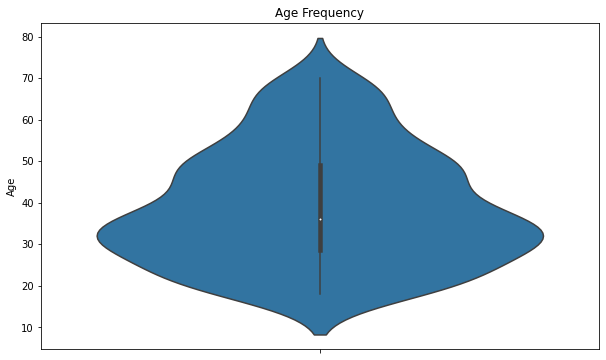

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.title('Age Frequency')
sns.violinplot(y=df["Age"])
plt.show

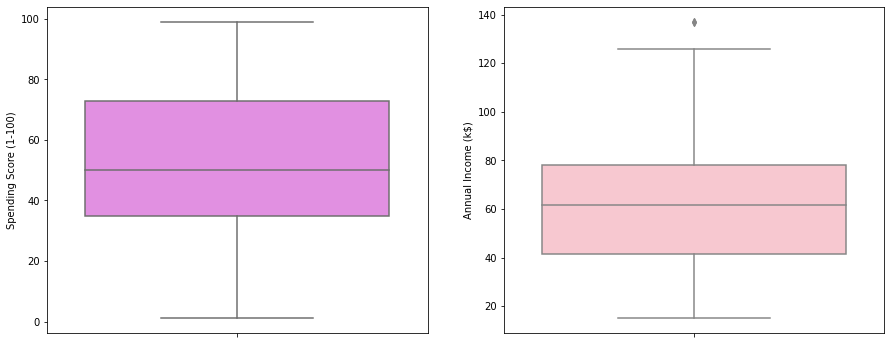

In [29]:
#box plot - of spending score and annual income to better visualize the distribution range
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"],color="violet")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"],color="pink")
plt.show()

In [30]:
df['Age']

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

In [31]:
#DataFrame[(DataFrame['Age']==22)&DataFrame['stream'].isin(options)]

In [32]:
df['Age'][(df["Age"]>=18)&(df["Age"]<=25)]

0      19
1      21
2      20
3      23
5      22
7      23
13     24
15     22
17     20
21     25
29     23
31     21
33     18
35     21
39     20
41     24
45     24
61     19
65     18
68     19
78     23
84     21
87     22
91     18
95     24
99     20
100    23
105    21
111    19
113    19
114    18
115    19
124    23
132    25
134    20
138    19
144    25
162    19
Name: Age, dtype: int64

In [33]:
#make a bar plot to check the distribution the no. of customers in each grp
Age18_25=df['Age'][(df["Age"]>=18)&(df["Age"]<=25)]
Age26_35=df['Age'][(df["Age"]>=26)&(df["Age"]<=35)]
Age36_45=df['Age'][(df["Age"]>=36)&(df["Age"]<=45)]
Age46_55=df['Age'][(df["Age"]>=46)&(df["Age"]<=55)]
Age46_55=df['Age'][(df["Age"]>=55)]

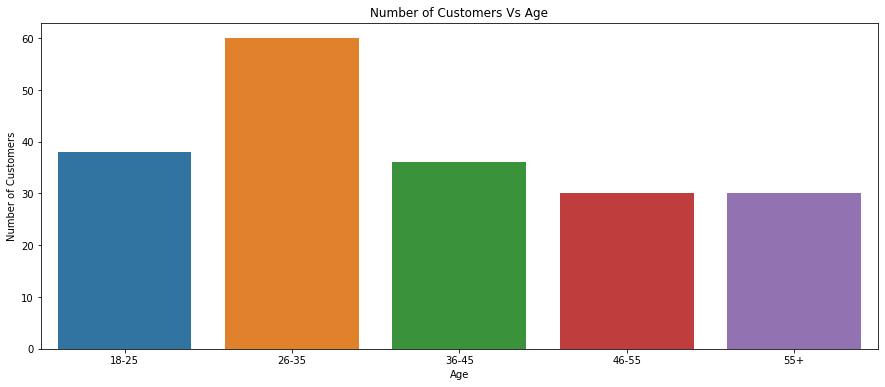

In [34]:
x=["18-25","26-35","36-45","46-55","55+"]
y=[len(Age18_25),len(Age26_35),len(Age36_45),len(Age46_55),len(Age46_55)]

plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y)
plt.title("Number of Customers Vs Age")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


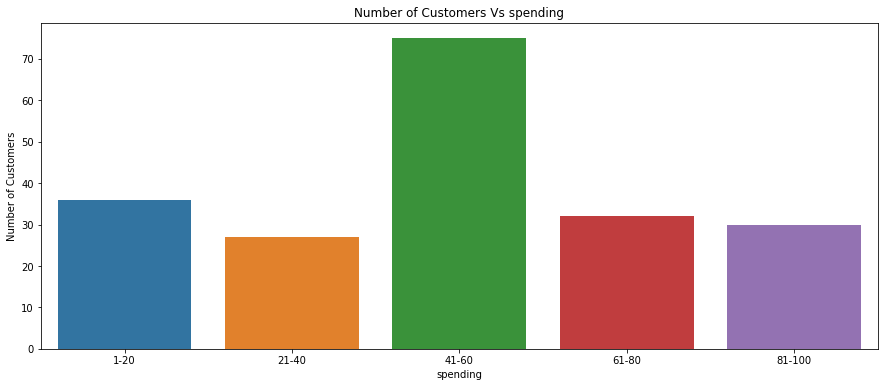

In [36]:
#lets visualize the no. of customers according to their spending score
ss1_20=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1)&(df["Spending Score (1-100)"]<=20)]
ss1_40=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21)&(df["Spending Score (1-100)"]<=40)]
ss1_60=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41)&(df["Spending Score (1-100)"]<=60)]
ss1_80=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61)&(df["Spending Score (1-100)"]<=80)]
ss1_100=df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81)&(df["Spending Score (1-100)"]<=100)]

x=["1-20","21-40","41-60","61-80","81-100"]
y=[len(ss1_20),len(ss1_40),len(ss1_60),len(ss1_80),len(ss1_100)]

plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y)
plt.title("Number of Customers Vs spending")
plt.xlabel("spending")
plt.ylabel("Number of Customers")
plt.show()


In [37]:
ai1_30 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=1)&(df["Annual Income (k$)"]<=30)]

ai31_60 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=31)&(df["Annual Income (k$)"]<=60)]

ai61_90 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=61)&(df["Annual Income (k$)"]<=90)]

ai91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"]>=91)&(df["Annual Income (k$)"]<=120)]

ai121_150 =df["Annual Income (k$)"][(df["Annual Income (k$)"]>=121)&(df["Annual Income (k$)"]<=150)]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


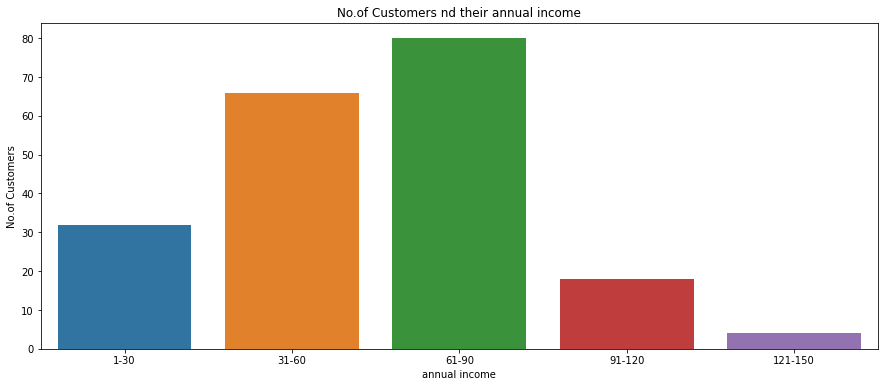

In [38]:
x=["1-30","31-60","61-90","91-120","121-150"]

y=[len(ai1_30),len(ai31_60 ),len(ai61_90),len(ai91_120),len(ai121_150)]

plt.figure(figsize=(15,6))

sns.barplot(x,y)

plt.title("No.of Customers nd their annual income")

plt.xlabel("annual income")

plt.ylabel("No.of Customers")

plt.show()

In [39]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [40]:
df.iloc[:,-3:]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [41]:
'''Unsupervised'''
from sklearn.cluster import KMeans
#Train our model
km =KMeans(n_clusters=2)
clusters=km.fit_predict(df.iloc[:,-3:])


In [44]:
df["label"] = clusters

In [45]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,1
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,0
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,1
197,Male,32,126,74,0
198,Male,32,137,18,1


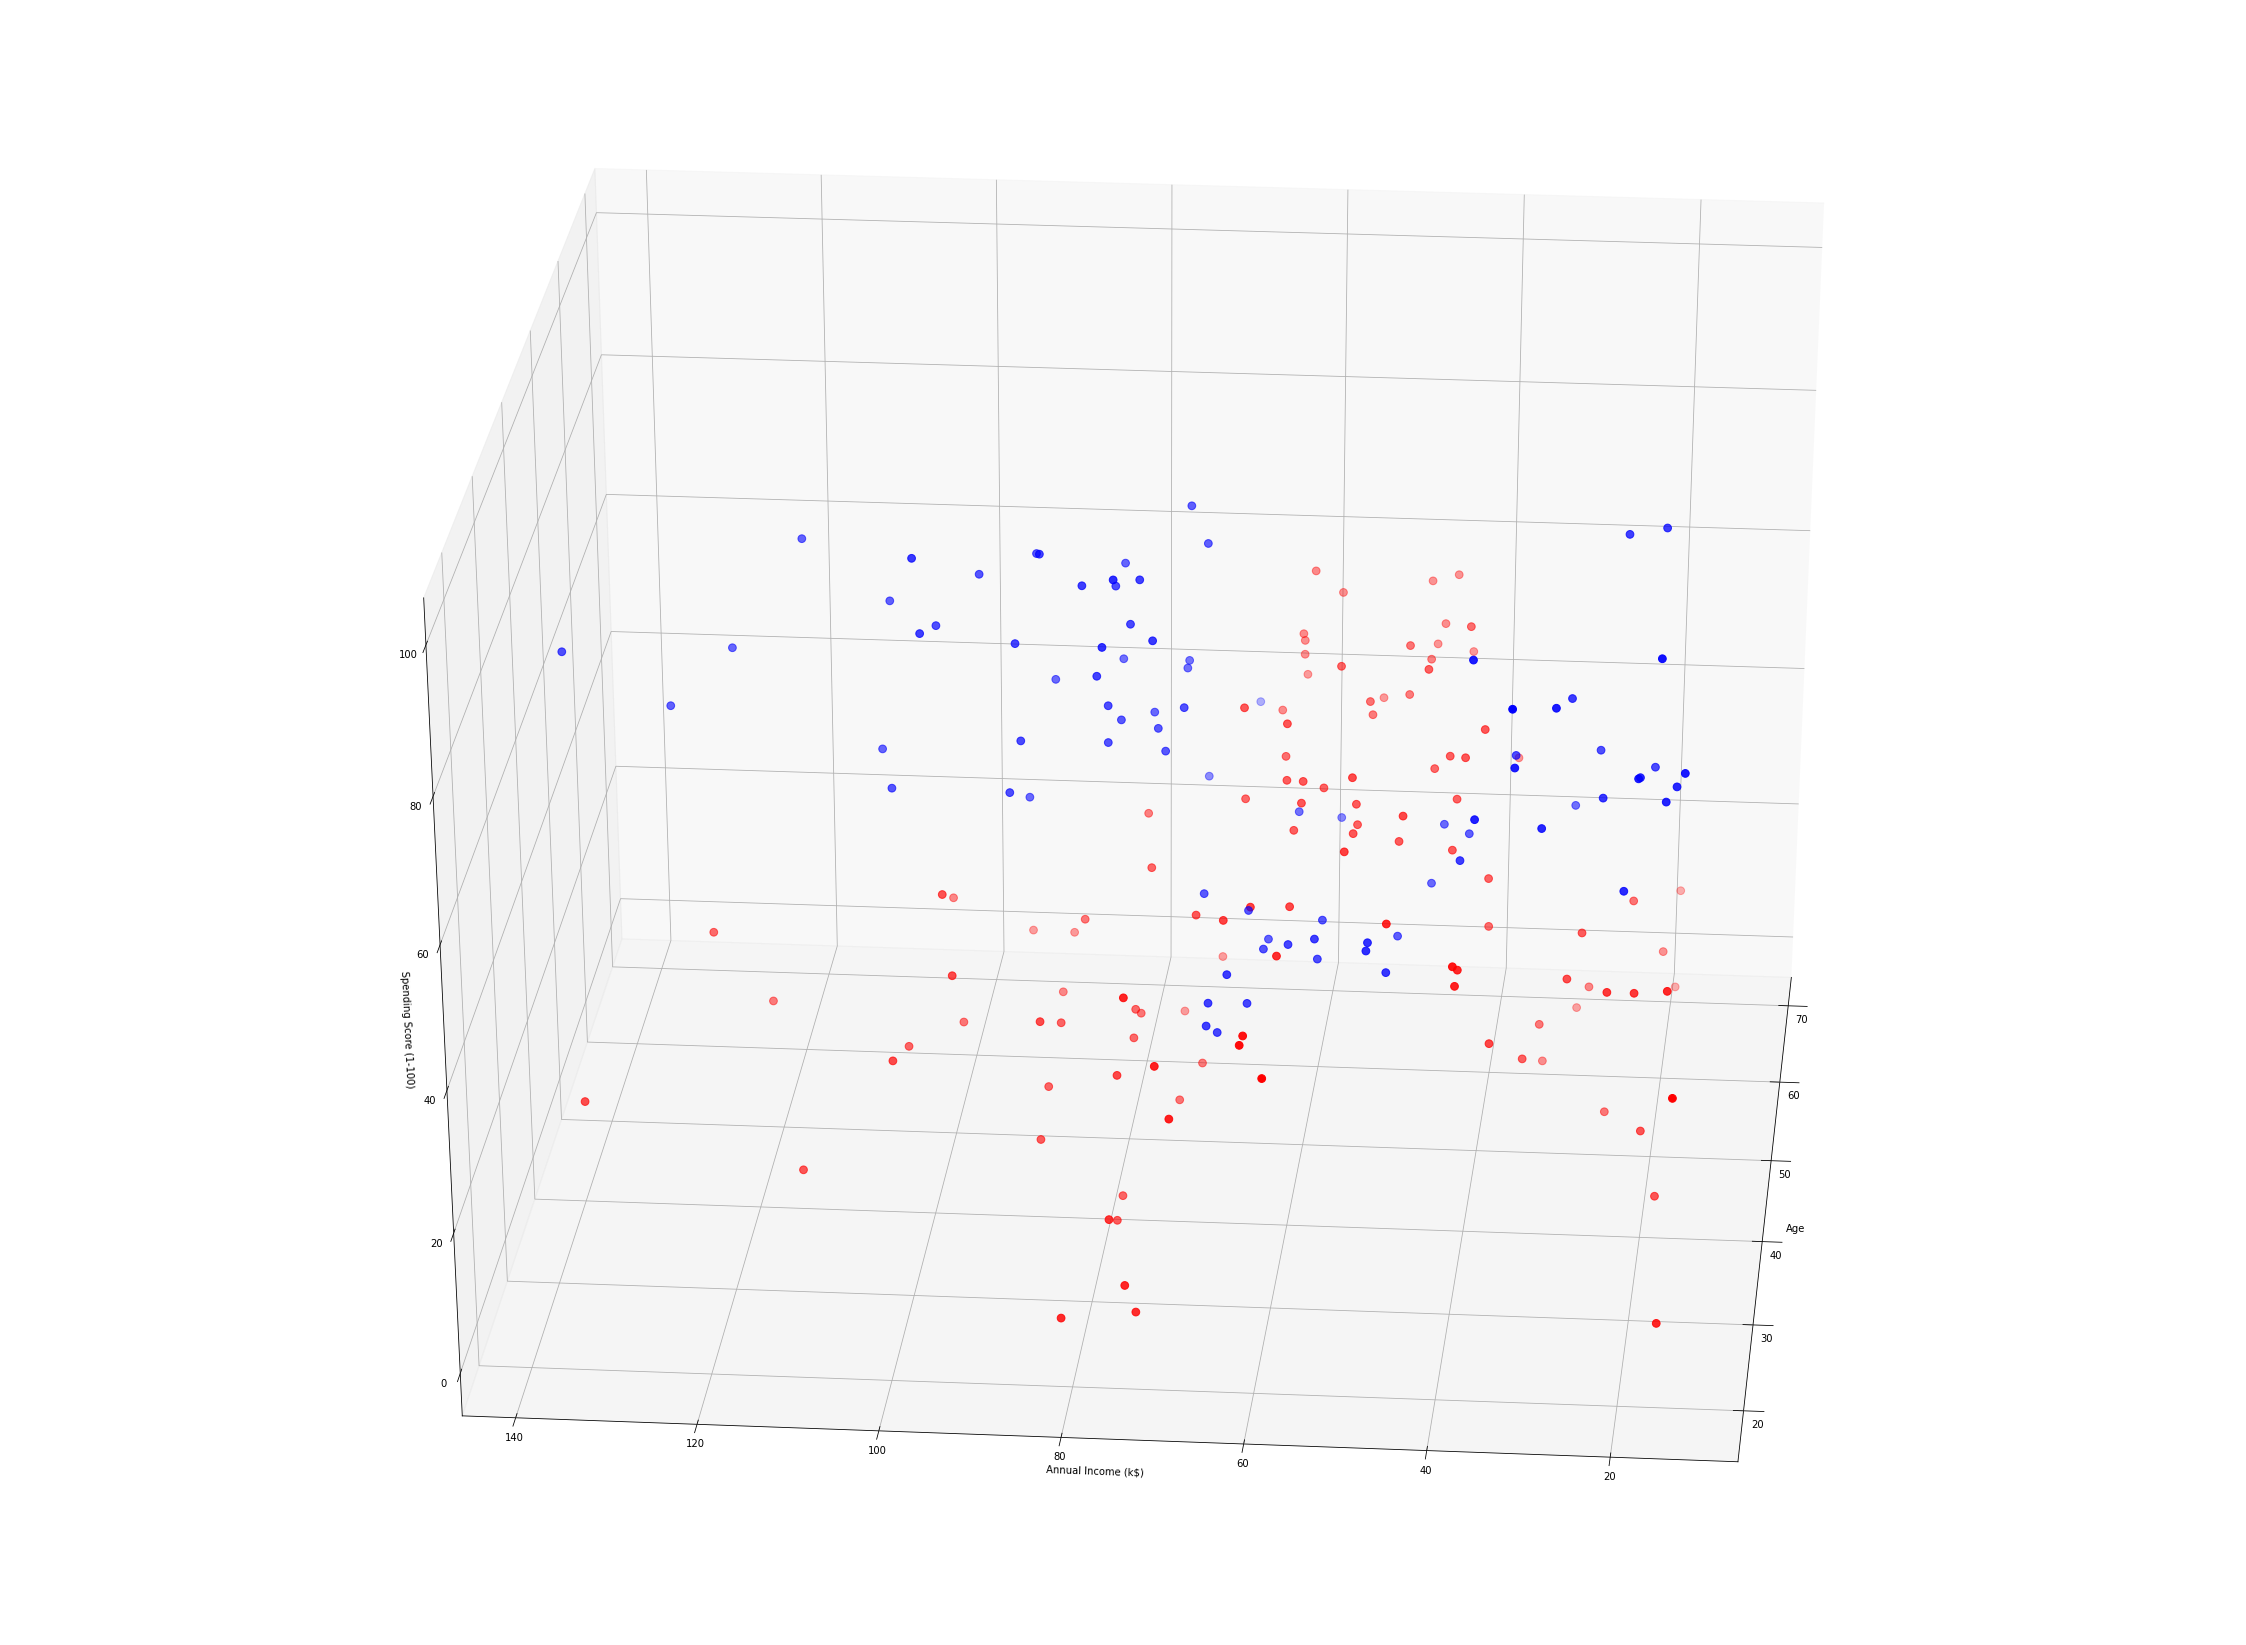

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

#SYNOPSIS: We didn't get the perfect Clusters - Variance (Error) is not minimized


[270030.15499999997, 183517.7865025467, 106377.16981007869, 73704.62903948833, 44465.344336822585, 37282.75409373235, 30244.221897767402, 25079.449952402672, 21931.840800293525, 19718.84138887227]


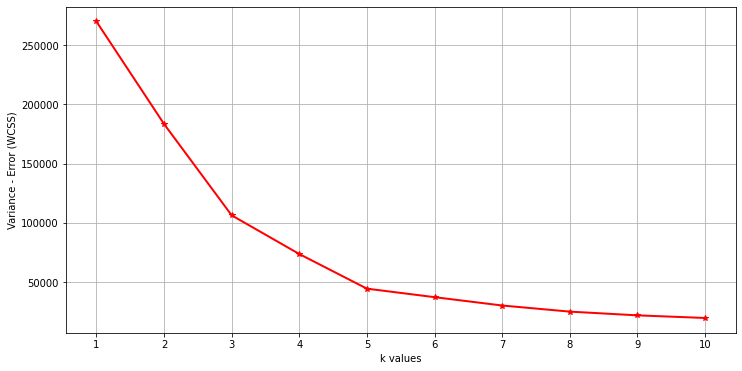

In [47]:
#Elbow point - To find the optimal k value
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(df.iloc[:,-3:])
  wcss.append(kmeans.inertia_)

print(wcss)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="*")
plt.xlabel("k values")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Variance - Error (WCSS)")
plt.show()

#SYNOPSIS: The optimal k cluster value is 5

In [48]:
from sklearn.cluster import KMeans
#Train our model
km =KMeans(n_clusters=5)
clusters=km.fit_predict(df.iloc[:,-3:])

In [49]:
df["label"] = clusters

In [50]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,Male,19,15,39,2
1,Male,21,15,81,4
2,Female,20,16,6,2
3,Female,23,16,77,4
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,3
197,Male,32,126,74,1
198,Male,32,137,18,3


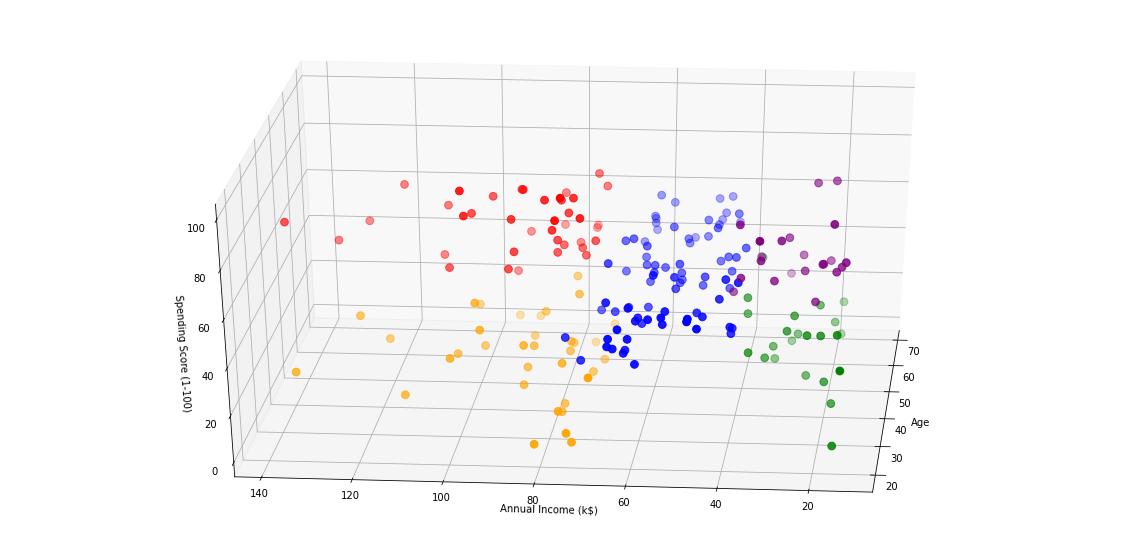

In [51]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [52]:
#User -   Predicting the Cluster of new customer - membership card
age = int(input("Enter Age:"))
anual_income = int(input("Enter Annual Income of customer: "))
spend_score = int(input("Enter Spending Score:"))
res_cluster = km.predict([[age,anual_income,spend_score]])

Enter Age:21
Enter Annual Income of customer: 15
Enter Spending Score:39


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [53]:
print("new Customer belongs to Cluster: ",res_cluster[0])

new Customer belongs to Cluster:  2
